In [ ]:
import numpy as np
#import pandas as pd 
from keras import utils
from keras import models
from keras import layers
import keras
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import io

In [ ]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
data_path = "ships32"
img_size = 32
batch_size = 32

In [ ]:
traindata, validdata = utils.image_dataset_from_directory(
    data_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_size, img_size),
    shuffle=True,
    validation_split=0.2,
    subset="both",
    seed=1234
)

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in traindata.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(traindata.class_names[np.argmax(labels[i])])
        plt.axis("off")

In [ ]:
model = models.Sequential()
nfilters = 32
kernel_size = (5,5)
model.add(layers.Input((32,32,3)))
model.add(layers.Rescaling(1.0 / 255))

model.add(layers.Conv2D(nfilters, kernel_size, padding="same"))
model.add(layers.LayerNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPool2D())

model.add(layers.Conv2D(nfilters * 2, kernel_size, padding="same"))
model.add(layers.LayerNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPool2D())

model.add(layers.Conv2D(nfilters * 4, kernel_size, padding="same"))
model.add(layers.LayerNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPool2D())

model.add(layers.Flatten())
#model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.4))

model.add(layers.Dense(len(traindata.class_names), activation="softmax"))
model.summary()

In [ ]:
len(model.layers)

In [ ]:
epochs = 10
lr = 0.001

model.compile(optimizer=keras.optimizers.Adam(lr), loss= keras.losses.CategoricalCrossentropy(), metrics=[keras.metrics.CategoricalAccuracy()])

history = model.fit(traindata, epochs=epochs, validation_data=validdata)

#0.6156

In [ ]:
summary_buffer = io.StringIO()
model.summary(print_fn=lambda x: summary_buffer.write(x + "\n"))
summary_text = summary_buffer.getvalue()
with PdfPages("graphs/accuracy_plot3_alexnetLike_FirstTestblaaa.pdf") as pdf:
    plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_categorical_accuracy'], label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend(loc='upper left')
    plt.grid(True)
    pdf.savefig()
    plt.show()
    plt.close()

    fig, ax = plt.subplots(figsize=(8.5, 11)) 
    ax.axis('off')
    plt.text(0, 1, summary_text, fontsize=10, va='top', family='monospace')
    pdf.savefig(fig)
    plt.close()

In [ ]:
model.save("models/alexnetLike_FirstTest.keras")

### Test with alexNet's model adapted:
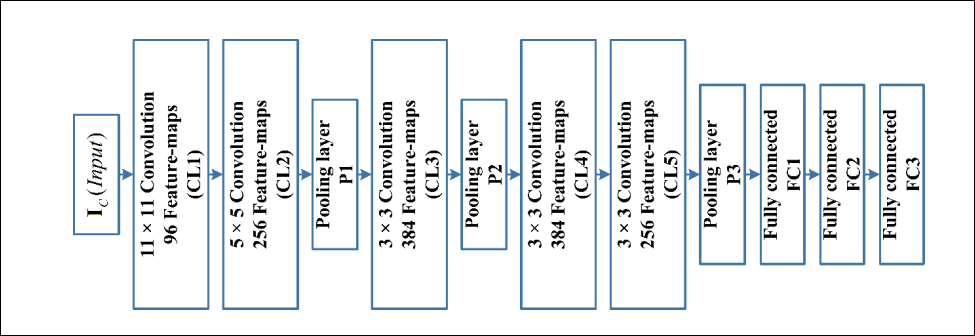

In [ ]:
model = models.Sequential()
model.add(layers.Input((32,32,3)))
model.add(layers.Rescaling(1.0 / 255))

model.add(layers.Conv2D(256, (5,5), padding="same"))
model.add(layers.Activation('relu'))
model.add(layers.MaxPool2D())

model.add(layers.Conv2D(384, (3,3), padding="same"))
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(384, (3,3), padding="same"))
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(256, (3,3), padding="same"))
model.add(layers.Activation('relu'))
model.add(layers.MaxPool2D())


model.add(layers.Flatten())

model.add(layers.Dense(4096, activation="relu"))
model.add(layers.Dense(len(traindata.class_names), activation="softmax"))

model.summary()